# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

#### Question 1.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
os.getcwd()

'/mnt/c/Users/krngz/OneDrive - University of Virginia/DS 3021 - Analytics/DS3021_repo/linearModels/lab'

In [2]:
cars = pd.read_csv("data/cars_hw.csv")
cars.head()

print(cars.dtypes)

print(cars.isnull().sum()) #sum of missing values per column

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object
Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64


Data has no null values. However, I want to transform the variable 'No_of_Owners' from an object to an integer. Currently, the variable holds values like "1st" and "2nd."

In [3]:
cars["No_of_Owners"] = cars["No_of_Owners"].str.extract(r"(\d+)").astype(int)
print(cars.dtypes)
print(cars.head())

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners          int64
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

   No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0             1                 5    diesel      7-Speed         Automatic   
1             1                 5    petrol      5-Speed     

Some basic EDA

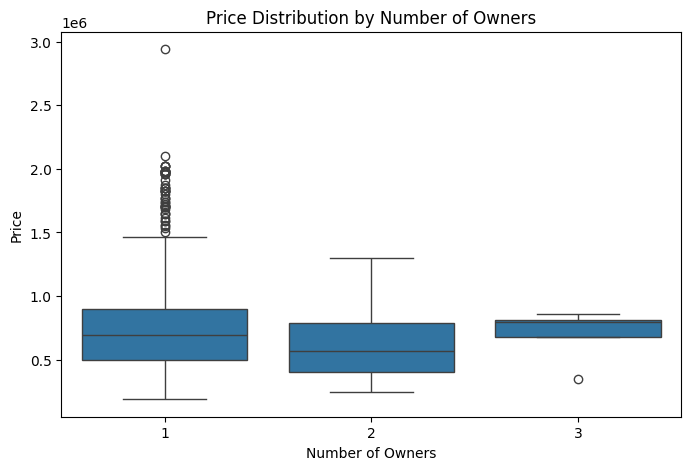

In [4]:
#number of owners and price

plt.figure(figsize=(8,5))
sns.boxplot(x="No_of_Owners", y="Price", data = cars)

plt.xlabel("Number of Owners")
plt.ylabel("Price")
plt.title("Price Distribution by Number of Owners")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Volkswagen'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Renault'),
  Text(4, 0, 'Tata'),
  Text(5, 0, 'Chevrolet'),
  Text(6, 0, 'Maruti Suzuki'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Mahindra'),
  Text(9, 0, 'Ford'),
  Text(10, 0, 'Nissan'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'MG Motors'),
  Text(13, 0, 'Kia'),
  Text(14, 0, 'Skoda'),
  Text(15, 0, 'Datsun')])

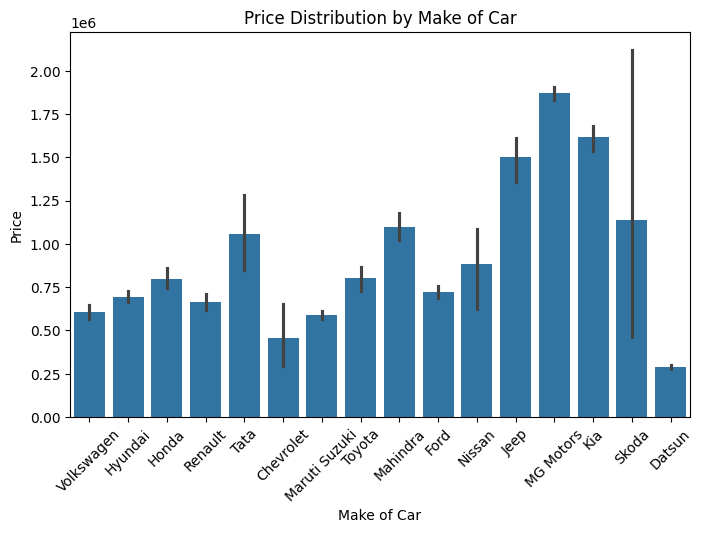

In [5]:
#plot car make and price 

cars["Make"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x="Make", y="Price", data=cars)
plt.xlabel("Make of Car")
plt.title("Price Distribution by Make of Car")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Price distribution by Make Year of Car')

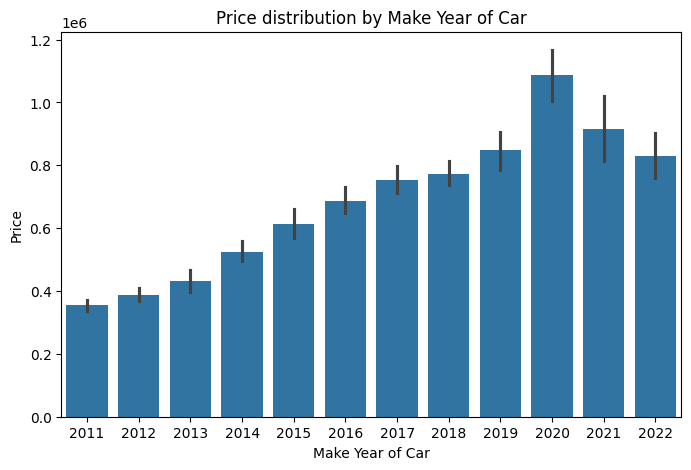

In [6]:
#plot year and price
cars["Make_Year"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x="Make_Year", y="Price", data=cars)
plt.xlabel("Make Year of Car")
plt.title("Price distribution by Make Year of Car")

#### Question 2.

In [7]:
cars.dtypes

#transforming cat vars by one-hot encoding (for nomical categories - no order)
cars = pd.get_dummies(cars, columns=["Make","Color", "Fuel_Type", "Body_Type", "Transmission", "Transmission_Type"])

print(cars.head())
print(cars.dtypes)

   Unnamed: 0  Make_Year  Mileage_Run  No_of_Owners  Seating_Capacity   Price  \
0           1       2017        44611             1                 5  657000   
1           2       2016        20305             1                 5  682000   
2           3       2019        29540             2                 5  793000   
3           4       2017        35680             1                 5  414000   
4           5       2017        25126             1                 5  515000   

   Make_Chevrolet  Make_Datsun  Make_Ford  Make_Honda  ...  Body_Type_muv  \
0           False        False      False       False  ...          False   
1           False        False      False       False  ...          False   
2           False        False      False        True  ...          False   
3           False        False      False       False  ...          False   
4           False        False      False       False  ...          False   

   Body_Type_sedan  Body_Type_suv  Transmission_4-

#### Question 3.

In [9]:
X = cars.drop(columns="Price")
selected_features = ["Make_Year", "Mileage_Run", "No_of_Owners", "Seating_Capacity", "Transmission_Type_Automatic"]
X_selected = X[selected_features]
y = cars["Price"]

#split
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 36)
print(X_selected_train.shape, X_selected_test.shape, y_train.shape, y_test.shape)

(780, 51) (196, 51) (780,) (196,)


#### Question 4. 

In [10]:
#train a simple linear regression model 

lr = LinearRegression() #initialize model
lr.fit(X_selected_train, y_train) #fit the model

#predicting on both training and test sets
y_train_pred = lr.predict(X_selected_train)
y_test_pred = lr.predict(X_selected_test)

#RMSE (we want a lower score here)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

#R-squared (here we want a value closer to 1)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#print our results
print(f"Training RMSE: {rmse_train:.2f}, R squared: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.2f}, R squared: {r2_test:.4f}")


Training RMSE: 143937.34, R squared: 0.8502
Test RMSE: 131610.61, R squared: 0.8562


In [11]:
#average price of data
avg_price = cars["Price"].mean()
print(avg_price)

741019.4672131147


The training and testing model had an R squared of 0.8502 and 0.8562 respectively. This means that our testing model did a better job at explaining most of the price variations.

#### Question 5.

In [ ]:
cars.dtypes
#Make_Year, Mileage_Run, No_of_Owners, Seating_Capacity, Price are numeric variables

In [12]:
#partial correlaiton plots show the relationship between two variables while controling the effects of other variables. This is used because regular correlation might be misleading due to confounding variables.
import statsmodels.api as sm

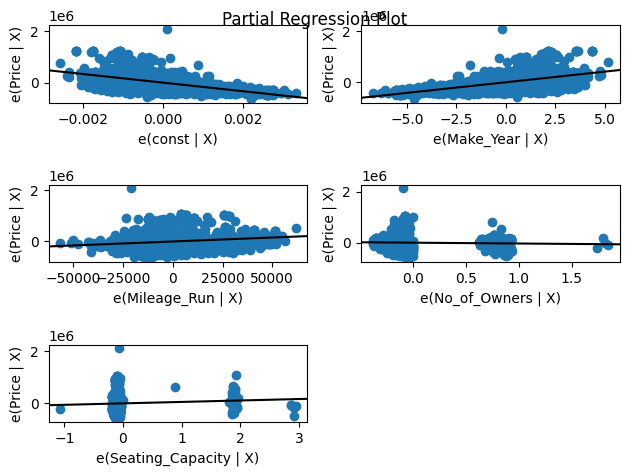

In [13]:
#fit the regression model 

X = cars[["Make_Year", "Mileage_Run", "No_of_Owners", "Seating_Capacity"]] #independent variables

y = cars["Price"] #dependent variable

X = sm.add_constant(X) # adding a constant 

model = sm.OLS(y, X).fit() #fitting the model

#creating partial regression plots for predictors
fig = sm.graphics.plot_partregress_grid(model)
plt.show()

Any significant non-linearities include the number of owners, which has no clear trend. The seating capacity variable seems to not have a clear trend as well. Our mileage partial regression plot is also interesting because there are negative values; it also has a slight positive trend.

#### Question 6.

In [14]:
#transformations
#log-transform price to stabilize variance
cars["Log_Price"] = np.log1p(cars["Price"]) # this is log(price +1) to avoid Log(0)
cars["Log_Mileage_Run"] = np.log1p(cars["Mileage_Run"])

#interactions
cars["Make_Year_x_Mileage"] = cars["Make_Year"] * cars["Mileage_Run"]
cars["Make_Year_x_LogMileage"] = cars["Make_Year"] * cars["Log_Mileage_Run"]

In [ ]:

#build a more complex model about features that determine car's value
X = cars[["Make_Year", "Log_Mileage_Run", "MakeYear_x_LogMileage"]]
y = cars["Log_Price"] #using log-transoformed price 

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#training the model
model = LinearRegression()
mode.fit(X_train, y_train)

#predictions
y_train_pred = model.predict(X_train)
y_test_pred = moel.predict(X_test)

#evaluating the model

#determine RMSE and R-squared on training and test sets.

How does complex model compare to the simlpler one?